In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r'tmdb_5000_movies.csv')
cred = pd.read_csv(r'tmdb_5000_credits.csv')
cred.columns = ['id','title','cast','crew']
data = data.merge(cred,on='id')

In [3]:
data.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [4]:
data.shape, cred.shape

((4803, 23), (4803, 4))

In [5]:
m = 'The Godfather'
id = data[data['title_y']==m]['id'].astype(int)
type(id)
id

3337    238
Name: id, dtype: int32

In [6]:
data.release_date.sort_values(ascending = False)

4255    2017-02-03
3408    2016-10-02
3302    2016-09-16
4720    2016-09-09
3249    2016-09-09
           ...    
4457    1929-01-30
2638    1927-01-10
4661    1925-11-05
4592    1916-09-04
4553           NaN
Name: release_date, Length: 4803, dtype: object

In [7]:
import os

In [8]:
c = os.getcwd()
c

'C:\\Users\\HP\\Desktop\\All Final Projects\\Project Machine Learning\\movie_recc_streamlit-main project file\\movie_recc_streamlit-main project file'

In [9]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [10]:
cred.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

            The dataset has the following features:-

            - budget - The budget in which the movie was made.
            - genre - The genre of the movie, Action, Comedy ,Thriller etc.
            - homepage - A link to the homepage of the movie.
            - id - This is infact the movie_id as in the first dataset.
            - keywords - The keywords or tags related to the movie.
            - original_language - The language in which the movie was made.
            - original_title - The title of the movie before translation or adaptation.
            - overview - A brief description of the movie.
            - popularity - A numeric quantity specifying the movie popularity.
            - production_companies - The production house of the movie.
            - production_countries - The country in which it was produced.
            - release_date - The date on which it was released.
            - revenue - The worldwide revenue generated by the movie.
            - runtime - The running time of the movie in minutes.
            - status - "Released" or "Rumored".
            - tagline - Movie's tagline.
            - title - Title of the movie.
            - **vote_average** - average ratings the movie recieved.
            - **vote_count** - the count of votes recieved.

# Simple Recommender

Approach:

- The Simple Recommender offers generalized recommendations to every user based on movie popularity and (sometimes) genre.

- The basic idea behind this recommender is that movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience.

- This model does not give personalized recommendations based on the user.

What we are actually doing:

- The implementation of this model is extremely trivial.
- All we have to do is sort our movies based on ratings and popularity and display the top movies of our list.
- As an added step, we can pass in a genre argument to get the top movies of a particular genre.

### Rating a movie:

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-



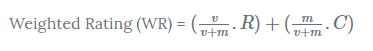

- v is the number of votes for the movie;
- m is the minimum votes required to be listed in the chart;
- R is the average rating of the movie; And
- C is the mean vote across the whole report

 We already have v(vote_count) and R (vote_average) and C can be calculated as

In [11]:
C = data['vote_average'].mean()
C

6.092171559442016

The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [12]:
m = data['vote_count'].quantile(0.9)
m

1838.4000000000015

Hence, movies only with votes more than 1838 qualify for charts.

In [13]:
qual = data.copy().loc[data['vote_count']>=m]

In [14]:
qual.shape #481 movies qualified.

(481, 23)

#### Scoring our top movies:
this function gives each qualified movie a SCORE.

In [15]:
def wt_rate(x, m=m,C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [16]:
qual['score'] = qual.apply(wt_rate,axis=1)

In [17]:
qual = qual.sort_values('score',ascending=False)

In [18]:
qual.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew', 'score'],
      dtype='object')

#### TOP rated movies

In [19]:
qual[['title_y', 'vote_count', 'vote_average', 'score']].head(10)


,title_y,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


#### Popular movies

In [20]:
pop = data.sort_values('popularity',ascending = False)

In [21]:
pop['title_y'].head(10)

546                                              Minions
95                                          Interstellar
788                                             Deadpool
94                               Guardians of the Galaxy
127                                   Mad Max: Fury Road
28                                        Jurassic World
199    Pirates of the Caribbean: The Curse of the Bla...
82                        Dawn of the Planet of the Apes
200                The Hunger Games: Mockingjay - Part 1
88                                            Big Hero 6
Name: title_y, dtype: object

### GENRE CHARTS

#### JSON TO GET VALUES:

In [22]:
a = data['genres'][0] #JSON STRING
a

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [23]:
import json
j = json.loads(a)
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [24]:
type(j)

list

In [25]:
j[0]['name']

'Action'

In [26]:
def gen_list(x):
    j = json.loads(x)
    a=[]
    for i in range(len(j)):
        if(i<3):
            a.append(j[i]['name'])
        else:
            break
    
    return a
#TOP 3 GENRES

In [27]:
x = gen_list(a)
x

['Action', 'Adventure', 'Fantasy']

In [28]:
data['genre'] = data['genres'].apply(gen_list)

In [30]:
data.genre

0               [Action, Adventure, Fantasy]
1               [Adventure, Fantasy, Action]
2                 [Action, Adventure, Crime]
3                     [Action, Crime, Drama]
4       [Action, Adventure, Science Fiction]
                        ...                 
4798               [Action, Crime, Thriller]
4799                       [Comedy, Romance]
4800                [Comedy, Drama, Romance]
4801                                      []
4802                           [Documentary]
Name: genre, Length: 4803, dtype: object

In [29]:
def gen_chart(genre,percentile=0.85):
    df = data['genre'].apply(lambda x:True if (genre in x) else False)
    df = data[df]
    
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title_y','vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count']
    qualified['vote_average'] = qualified['vote_average']
    
    qualified['score'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('score', ascending=False).head(250)
    
    return qualified.head(30)

In [30]:
u = []
for i in data['genre']:
    for j in i:
        u.append(j)
t = np.unique(u)
t

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype='<U15')

In [31]:
gen_chart('Romance').head(15)

,title_y,vote_count,vote_average,popularity,score
809,Forrest Gump,7927,8.2,138.133331,7.949399
1997,Her,4097,7.9,53.682367,7.511951
2152,Eternal Sunshine of the Spotless Mind,3652,7.9,56.481487,7.474072
2547,The Theory of Everything,3311,7.8,61.182331,7.361136
1260,Amélie,3310,7.8,73.720244,7.361032
25,Titanic,7562,7.5,100.025899,7.313551
1559,The Notebook,3067,7.7,55.109138,7.257008
493,A Beautiful Mind,3009,7.7,59.248437,7.250446
2776,The Perks of Being a Wallflower,2968,7.7,43.444135,7.245690
2838,The Fault in Our Stars,3759,7.6,74.358971,7.242145


In [32]:
gen_chart('Drama').head(15)

,title_y,vote_count,vote_average,popularity,score
1881,The Shawshank Redemption,8205,8.5,136.747729,8.231022
662,Fight Club,9413,8.3,146.757391,8.080986
3337,The Godfather,5893,8.4,143.659698,8.054518
65,The Dark Knight,12002,8.2,187.322927,8.032172
809,Forrest Gump,7927,8.2,138.133331,7.955295
95,Interstellar,10867,8.1,724.247784,7.924265
1818,Schindler's List,4329,8.3,104.469351,7.870819
3865,Whiplash,4254,8.3,192.528841,7.864656
2731,The Godfather: Part II,3338,8.3,105.792936,7.772069
690,The Green Mile,4048,8.2,103.698022,7.766095


In [33]:
genre_list = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western']
gen = pd.DataFrame(gen_chart('Action')['title_y']).head(30)
gen['action'] = gen
gen = gen.reset_index()
gen = gen.drop(['index','title_y'],axis=1)


In [34]:
for i in genre_list[1:]:
    x = pd.DataFrame(gen_chart(i)['title_y']).head(30)
    x[i] = x
    x = x.reset_index()
    x = x.drop(['index','title_y'],axis=1)
    
    gen = pd.concat([gen,x],axis=1)
    

In [37]:
c = data.head(5)
c

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,genre
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Action, Adventure, Fantasy]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Adventure, Fantasy, Action]"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Action, Adventure, Crime]"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Action, Crime, Drama]"
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Action, Adventure, Science Fiction]"


In [40]:
for i in c['title_y']:
    print(i)

TypeError: string indices must be integers, not 'str'

# Content Based Recommendation

We are going to use content based filtering on:
- Plot description based Recommender/ similarity of the plots
- Credits, Genres and Keywords Based Recommender
- Content-based recommendations (based on similarity of actors, director, and genres)

 Content-Based recommender system tries to guess the features or behavior of a user given the item’s features, he/she reacts positively to.
  During recommendation, the similarity metrics (We will talk about it in a bit) are calculated from the item’s feature vectors and the user’s preferred feature vectors from his/her previous records. Then, the top few are recommended.

### PLOT BASED recommendation

In [41]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew', 'genre'],
      dtype='object')

In [42]:
pd.set_option('max_colwidth', 800)

In [43]:
data.overview[0] #example of plot.


'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [44]:
data[data['id']==597]['overview']

25    84 years later, a 101-year-old woman named Rose DeWitt Bukater tells the story to her granddaughter Lizzy Calvert, Brock Lovett, Lewis Bodine, Bobby Buell and Anatoly Mikailavich on the Keldysh about her life set in April 10th 1912, on a ship called Titanic when young Rose boards the departing ship with the upper-class passengers and her mother, Ruth DeWitt Bukater, and her fiancé, Caledon Hockley. Meanwhile, a drifter and artist named Jack Dawson and his best friend Fabrizio De Rossi win third-class tickets to the ship in a game. And she explains the whole story from departure until the death of Titanic on its first and last voyage April 15th, 1912 at 2:20 in the morning.
Name: overview, dtype: object

#### TFIDF 
TF-IDF stands for Term Frequency - Inverse Document Frequency and is a statistic that aims to better define how important a word is for a document, while also taking into account the relation to other documents from the same corpus.

This is performed by looking at how many times a word appears into a document while also paying attention to how many times the same word appears in other documents in the corpus.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
data['overview'] = data['overview'].fillna('')

In [46]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['overview'])

In [47]:
tfidf_matrix

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

In [52]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
feature_names = tfidf.get_feature_names()

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

In [49]:
df = pd.DataFrame(tfidf_matrix.T.todense(), index=feature_names, columns=data['overview'])
print(df.head())

NameError: name 'feature_names' is not defined

In [50]:
tfidf_matrix.shape

(4803, 20978)

- We see that over 20,000 different words were used to describe the 4800 movies in our dataset
- With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. 
- We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:


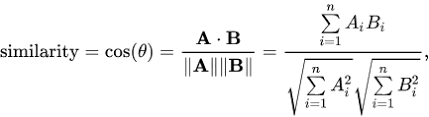

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [51]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [52]:
cosine_sim.shape #how similar are movie (plots) to each other

(4803, 4803)

### Getting recommendations:

Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [53]:
indices = pd.Series(data.index, index = data['title_y']).drop_duplicates()

In [54]:
indices

title_y
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

- Get the index of the movie given its title.
- Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
- Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
- Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
- Return the titles corresponding to the indices of the top elements.

In [55]:
def get_recc(title,cosine_sim = cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
     # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]
    #Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    return data['title_y'].iloc[movie_indices]
    

In [56]:
data['title_y'].iloc[[1,2,3]]

1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
Name: title_y, dtype: object

In [57]:
get_recc('Fight Club')

3619                      UHF
2828                Project X
2585          The Hurt Locker
2344              Raging Bull
2023               The Animal
1414      Blast from the Past
4044               Go for It!
3515             Freaky Deaky
4045    Dancer, Texas Pop. 81
Name: title_y, dtype: object

In [58]:
get_recc('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
Name: title_y, dtype: object

### Credits, Genres and Keywords Based Recommender

- Top 3 actors from cast
- Director from the crew
- Genre (top 3)
- keywords

Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [59]:
features = ['cast', 'crew', 'keywords', 'genres']

In [60]:
for f in features:
    print(type(data[f][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


You can see that each feature is present in the form of string from which we obtain the python objects like lists/dicts etc. with the help of literal_eval.

In [61]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    data[feature] = data[feature].apply(literal_eval)

In [62]:
for f in features:
    print(type(data[f][0]))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [63]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [64]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [65]:
# Define new director, cast, genres and keywords features that are in a suitable form.
data['director'] = data['crew'].apply(get_director)

features = ['cast', 'genres']
for feature in features:
    data[feature] = data[feature].apply(get_list)
    
data['keywords'] = data['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [66]:
data[['title_y', 'cast', 'director', 'keywords', 'genres']].head(3)

,title_y,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island, east india trading company, love of one's life, traitor, shipwreck, strong woman, ship, alliance, calypso, afterlife, fighter, pirate, swashbuckler, aftercreditsstinger]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent, sequel, mi6, british secret service, united kingdom]","[Action, Adventure, Crime]"


#### Clean data:

The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [67]:
def clean_data(x):
    if isinstance(x,list):
        return [str.lower(i.replace(" ","")) for i in x]
    else:
        if isinstance(x,str):
            return str.lower(x.replace(" ",""))
        else:
            return ''

In [68]:
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    data[feature] = data[feature].apply(clean_data)
data['director'] = data['director'].apply(lambda x: [x,x,x]) # 3times

**NOTE** - We have given more weightage to the director(3 times).

#### Keywords:

- We will do a small amount of pre-processing of our keywords before putting them to any use.
- we calculate the frequenct counts of every keyword that appears in the dataset.

In [69]:
s = data.apply(lambda x: pd.Series(x['keywords'],dtype ='str'),axis=1).stack().reset_index(level=1, drop=True)
s.head()

0    cultureclash
0          future
0        spacewar
0     spacecolony
0         society
dtype: object

In [70]:
s.name = 'keyword'
s = s.value_counts()
s[:5]

womandirector           324
independentfilm         318
duringcreditsstinger    307
basedonnovel            197
murder                  189
Name: keyword, dtype: int64

- Keywords occur in frequencies ranging from 1 to 324.
- We do not have any use for keywords that occur only once.
- Therefore, these can be safely removed.
- Finally, we will convert every word to its stem so that words such as Dogs and Dog are considered the same.

In [71]:
s = s[s>1]#removing frq = 1 words

##### STEMMER:

In [72]:

import nltk
from nltk.stem.snowball import SnowballStemmer
# Just an example
stemmer = SnowballStemmer('english')
stemmer.stem('dogs')

'dog'

In [73]:
def filter_keywords(x): #for removing s=1 freq words
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [74]:
data['keywords'] = data['keywords'].apply(filter_keywords)
data['keywords'] = data['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
data['keywords'] = data['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])


In [75]:
data[['title_y', 'cast', 'director', 'keywords', 'genres']].head(3)

,title_y,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[jamescameron, jamescameron, jamescameron]","[cultureclash, futur, spacewar, spacecoloni, societi, spacetravel, futurist, romanc, space, alien, tribe, alienplanet, cgi, marin, soldier, battl, loveaffair, antiwar, powerrel, mindandsoul, 3d]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[goreverbinski, goreverbinski, goreverbinski]","[ocean, drugabus, exoticisland, eastindiatradingcompani, loveofone'slif, traitor, shipwreck, strongwoman, ship, allianc, calypso, afterlif, fighter, pirat, swashbuckl, aftercreditssting]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[sammendes, sammendes, sammendes]","[spi, basedonnovel, secretag, sequel, mi6, britishsecretservic, unitedkingdom]","[action, adventure, crime]"


#### METASOUP:

We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [76]:
data['soup'] = data.apply(lambda x:  ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' +' '.join(x['director']) +' '+' '.join(x['genres']),axis = 1)
data[data['title_y']=='The Prestige']['soup']

1196    competit secret obsess magic dyinganddeath classsocieti illus trick hostil class rivalri hughjackman christianbale michaelcaine christophernolan christophernolan christophernolan drama mystery thriller
Name: soup, dtype: object

above is the example of soup for movie1.

#### CountVectorizer:

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
count =  CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(data['soup'])

#### Cosine similarity

In [78]:
from sklearn.metrics.pairwise import cosine_similarity

cs2 = cosine_similarity(count_matrix, count_matrix)
type(cs2)
cs2 #to csv

array([[1.        , 0.06362043, 0.0586883 , ..., 0.        , 0.        ,
        0.        ],
       [0.06362043, 1.        , 0.04169382, ..., 0.        , 0.        ,
        0.        ],
       [0.0586883 , 0.04169382, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [79]:
cs2.shape

(4803, 4803)

cs2_df = pd.DataFrame(cs2)
cs2_df.to_csv(r'C:\Users\omkar\Desktop\streamlit/cs2_file.csv')

In [80]:
data = data.reset_index()

In [81]:
indices = pd.Series(data.index, index = data['title_y'])
indices.head()

title_y
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

#### recommendations:

In [82]:
get_recc('The Dark Knight', cs2)

3          The Dark Knight Rises
119                Batman Begins
1196                The Prestige
4638    Amidst the Devil's Wings
96                     Inception
1033                    Insomnia
3573                     Memento
95                  Interstellar
428               Batman Returns
Name: title_y, dtype: object

In [83]:
get_recc('The Prestige', cs2)

1033                 Insomnia
3573                  Memento
96                  Inception
3       The Dark Knight Rises
119             Batman Begins
65            The Dark Knight
4589                   Fabled
95               Interstellar
3085                   Spider
Name: title_y, dtype: object

In [84]:
get_recc('Pulp Fiction', cs2)

684        The Hateful Eight
2822            Jackie Brown
830        Kill Bill: Vol. 2
4300          Reservoir Dogs
828        Kill Bill: Vol. 1
571     Inglourious Basterds
287         Django Unchained
574                 S.W.A.T.
2124        Lakeview Terrace
Name: title_y, dtype: object

#### IMPROVEMENT:

- We can of course experiment on this engine by trying out different weights for our features (directors, actors, genres), limiting the number of keywords that can be used in the soup, weighing genres based on their frequency, only showing movies with the same languages, etc.

- One thing that we notice about our recommendation system is that it recommends movies regardless of ratings and popularity. It is true that Batman and Robin has a lot of similar characters as compared to The Dark Knight but
it was a terrible movie that shouldn't be recommended to anyone. 

- Therefore, we will add a mechanism to remove bad movies and return movies which are popular and have had a good critical response.

- I will take the top 25 movies based on similarity scores and calculate the vote of the 60th percentile movie. Then, using this as the value of $m$, we will calculate the weighted rating of each movie using IMDB's formula like we did in the Simple Recommender section.

In [85]:
title = 'The Dark Knight'

In [86]:
idx = indices[title]
idx

65

In [87]:
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores[:10]

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.30151176591665485),
 (4, 0.009805867807909804),
 (5, 0.0),
 (6, 0.010758823231776737),
 (7, 0.009797613517382573),
 (8, 0.0),
 (9, 0.11863736843799158)]

In [88]:
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:26]
sim_scores

[(3, 0.30151176591665485),
 (428, 0.24943052490782133),
 (3854, 0.22451581982034283),
 (299, 0.21407005730021642),
 (1359, 0.18233430984787807),
 (119, 0.16203671480953252),
 (1181, 0.13462679652302015),
 (9, 0.11863736843799158),
 (2507, 0.1137383532501324),
 (210, 0.10689597818735441),
 (879, 0.10328880573857177),
 (2020, 0.09175975268150445),
 (205, 0.08943392102774211),
 (4135, 0.0872063923853466),
 (506, 0.08620146859138192),
 (2193, 0.07708036864131587),
 (4391, 0.07514189490790028),
 (1084, 0.0745441057658617),
 (3943, 0.07254937789458343),
 (606, 0.07234157464127895),
 (2987, 0.07104619620088544),
 (1440, 0.07097247998113307),
 (245, 0.07078932009293336),
 (4780, 0.07044454876613127),
 (817, 0.06756334922531913)]

In [89]:
movie_indices = [i[0] for i in sim_scores]
movie_indices


[3,
 428,
 3854,
 299,
 1359,
 119,
 1181,
 9,
 2507,
 210,
 879,
 2020,
 205,
 4135,
 506,
 2193,
 4391,
 1084,
 3943,
 606,
 2987,
 1440,
 245,
 4780,
 817]

In [90]:
movies = data.iloc[movie_indices][['title_y', 'vote_count', 'vote_average']]
movies

,title_y,vote_count,vote_average
3,The Dark Knight Rises,9106,7.6
428,Batman Returns,1673,6.6
3854,"Batman: The Dark Knight Returns, Part 2",419,7.9
299,Batman Forever,1498,5.2
1359,Batman,2096,7.0
119,Batman Begins,7359,7.5
1181,JFK,502,7.5
9,Batman v Superman: Dawn of Justice,7004,5.7
2507,Slow Burn,16,5.5
210,Batman & Robin,1418,4.2


In [91]:
vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
m = vote_counts.quantile(0.60)

In [92]:
qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified['wr'] = qualified.apply(wt_rate, axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_83044\786246990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_count'] = qualified['vote_count'].astype('int')
C:\Users\HP\AppData\Local\Temp\ipykernel_83044\786246990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_average'] = qualified['vote_average'].astype('int')
C:\Users\HP\AppData\Local\Temp\ipykernel_83044\786246990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [93]:
qualified = qualified.sort_values('wr', ascending=False).head(10)
qualified

,title_y,vote_count,vote_average,wr
3,The Dark Knight Rises,9106,7,6.847506
119,Batman Begins,7359,7,6.818541
506,Despicable Me 2,4637,7,6.742263
205,Sherlock Holmes: A Game of Shadows,3886,7,6.708449
1359,Batman,2096,7,6.575805
879,Law Abiding Citizen,1486,7,6.497969
428,Batman Returns,1673,6,6.048257
299,Batman Forever,1498,5,5.601801
9,Batman v Superman: Dawn of Justice,7004,5,5.227071
210,Batman & Robin,1418,4,5.181135


#### imporvement function:

In [94]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cs2[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = data.iloc[movie_indices][['title_y', 'vote_count', 'vote_average']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & 
                       (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(wt_rate, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    return qualified

In [95]:
improved_recommendations('Pulp Fiction')

C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_count'] = qualified['vote_count'].astype('int')
C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_average'] = qualified['vote_average'].astype('int')
C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,title_y,vote_count,vote_average,wr
4300,Reservoir Dogs,3697,8,7.366378
287,Django Unchained,10099,7,6.860191
571,Inglourious Basterds,6430,7,6.798153
828,Kill Bill: Vol. 1,4949,7,6.754110
684,The Hateful Eight,4274,7,6.726956
830,Kill Bill: Vol. 2,3948,7,6.711573
2822,Jackie Brown,1514,7,6.502162
1792,Pain & Gain,1573,6,6.049671
545,Unbreakable,1946,6,6.044775
568,xXx,1424,5,5.615451


In [96]:
improved_recommendations('Insidious')

C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_count'] = qualified['vote_count'].astype('int')
C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_average'] = qualified['vote_average'].astype('int')
C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,title_y,vote_count,vote_average,wr
44,Furious 7,4176,7,6.722507
2096,The Conjuring,3092,7,6.661498
4291,Saw,2184,7,6.585086
1160,The Conjuring 2,1949,7,6.559341
2990,Jeepers Creepers,720,6,6.066232
3000,Insidious: Chapter 3,983,6,6.060058
3554,Insidious: Chapter 2,1211,6,6.055568
2137,Texas Chainsaw 3D,465,5,5.871689
1926,The Possession,498,5,5.859377
3081,The Forest,448,4,5.682229


In [97]:
data['id']

0        19995
1          285
2       206647
3        49026
4        49529
         ...  
4798      9367
4799     72766
4800    231617
4801    126186
4802     25975
Name: id, Length: 4803, dtype: int64

In [98]:
import pickle


In [99]:
improved_recommendations('Avatar')


C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_count'] = qualified['vote_count'].astype('int')
C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_average'] = qualified['vote_average'].astype('int')
C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,title_y,vote_count,vote_average,wr
25,Titanic,7562,7,6.822459
19,The Hobbit: The Battle of the Five Armies,4760,7,6.747067
47,Star Trek Into Darkness,4418,7,6.733241
279,Terminator 2: Judgment Day,4185,7,6.722922
3439,The Terminator,4128,7,6.720275
322,The Fifth Element,3885,7,6.708399
38,The Amazing Spider-Man 2,4179,6,6.028160
126,Thor: The Dark World,4755,6,6.025700
17,Pirates of the Caribbean: On Stranger Tides,4948,6,6.024969
9,Batman v Superman: Dawn of Justice,7004,5,5.227071


In [100]:
improved_recommendations('The Godfather')

C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_count'] = qualified['vote_count'].astype('int')
C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_average'] = qualified['vote_average'].astype('int')
C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,title_y,vote_count,vote_average,wr
1881,The Shawshank Redemption,8205,8,7.650780
2731,The Godfather: Part II,3338,8,7.322434
1847,GoodFellas,3128,8,7.293784
1525,Apocalypse Now,2055,8,7.099155
867,The Godfather: Part III,1546,7,6.506869
2616,In Bruges,1388,7,6.482720
1394,Donnie Brasco,1147,7,6.440962
1167,Dracula,1056,7,6.423386
4209,The Conversation,372,7,6.244955
588,Wall Street: Money Never Sleeps,493,5,5.861220


In [101]:
improved_recommendations('Dune')

C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_count'] = qualified['vote_count'].astype('int')
C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_average'] = qualified['vote_average'].astype('int')
C:\Users\HP\AppData\Local\Temp\ipykernel_83044\681192296.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,title_y,vote_count,vote_average,wr
94,Guardians of the Galaxy,9742,7,6.855881
634,The Matrix,8907,7,6.844682
68,Iron Man,8776,7,6.842765
26,Captain America: Civil War,7241,7,6.816183
101,X-Men: First Class,5181,7,6.762237
74,Edge of Tomorrow,4858,7,6.750769
1490,Return of the Jedi,4665,7,6.743372
400,Divergent,4663,6,6.026063
51,Pacific Rim,4794,6,6.025549
228,Oblivion,4800,6,6.025525
